<a href="https://colab.research.google.com/github/Ttm2025/test/blob/main/VAz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
from locale import ABMON_10
from operator import truediv
from IPython.display import display, Math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
class Polynomial:
  def __init__(self, coef):
    self.coef = coef
    self.normalize()
    self.deg = len(self.coef) - 1
  def normalize(self):
    while len(self.coef) > 1 and self.coef[-1] == 0:
      self.coef = self.coef[:-1]
  def show(self, var="x"):
    display(Math(self.tolatex(var)))
  def tolatex(self, var="x"):
    if self.deg == 0:
      return str(self.coef[0])
    s = ""
    for i in range(self.deg, -1, -1):
      if self.coef[i] == 0:
        continue
      # знак
      sign = ""
      if self.coef[i] > 0 and i < self.deg:
        sign = "+"
      elif self.coef[i] < 0:
        sign = "-"
      # value
      v = abs(self.coef[i])
      value = str(v) if (v != 1 or i == 0) else ""
      # degree
      if i == 0:
        degree = ""
      elif i == 1:
        degree = var
      else:
        degree = f"{var}^{{{i}}}"
      s += sign + value + degree
    return s
  def diff(self,n=1):
    if self.deg == 0:
      return Polynomial([0])
    z=self
    for j in range(n):
      q = []
      for i, c in enumerate(z.coef):
        if i > 0: 
          q.append(i * c)
          z=Polynomial(q)
    return z
  def __call__(self, x):
    y = 0
    for i in range(self.deg, -1, -1):
      y = y * x + self.coef[i]
    return y
  def plot(self, a, b):
    dx = (b - a) / 100
    X = np.arange(a, b + dx, dx)
    Y = self.__call__(X)
    plt.plot(X, Y)
  def __eq__(self,t):
    if (self.deg != t.deg):
        return False;   
    for i in range (len(self.coef)):
        if (self.coef[i] != t.coef[i]):
          return False
    return True
  def __ne__(self,t):
    if (self.deg != t.deg):
        return True;   
    for i in range (len(self.coef)):
        if (self.coef[i] != t.coef[i]):
          return True
    return False 
  def __add__(self, P):
    if isinstance(P, int):
      P = Polynomial([P])  
    n = max(self.deg, P.deg) + 1
    A = (self.coef + [0] * n)[:n]
    B = (P.coef + [0] * n)[:n]
    C = [A[i] + B[i] for i in range(n)]
    return Polynomial(C)
  def __sub__(self, P):
    if isinstance(P, int):
      P = Polynomial([P])
    n = max(self.deg, P.deg) + 1
    A = (self.coef + [0] * n)[:n]
    B = (P.coef + [0] * n)[:n]
    C = [A[i] - B[i] for i in range(n)]
    return Polynomial(C)
  def __mul__(self, P):
    if isinstance(P, int):
      P = Polynomial([P])
    n = (self.deg + P.deg + 1)
    A = (self.coef + [0] * n)[:n]
    B = (P.coef + [0] * n)[:n]
    C = [0 for i in range(n)]
    for i in range(P.deg+1):
      for j in range(self.deg+1):
        C[i+j] += A[j]*B[i]
    return Polynomial(C)
  def __radd__(self, P):
    if isinstance(P, int):
      P = Polynomial([P])
    n = max(self.deg, P.deg) + 1
    A = (self.coef + [0] * n)[:n]
    B = (P.coef + [0] * n)[:n]
    C = [B[i] + C[i] for i in range(n)]
    return Polynomial(C)
  def __rsub__(self, P):
    if isinstance(P, int):
      P = Polynomial([P])
    n = max(self.deg, P.deg) + 1
    A = (self.coef + [0] * n)[:n]
    B = (P.coef + [0] * n)[:n]
    C = [B[i] - A[i] for i in range(n)]
    return Polynomial(C)
  def __rmul__(self, P):
    if isinstance(P, int):
      P = Polynomial([P])
    n = (self.deg + P.deg + 1)
    A = (self.coef + [0] * n)[:n]
    B = (P.coef + [0] * n)[:n]
    C = [0 for i in range(n)]
    for i in range(self.deg+1):
      for j in range(P.deg+1):
        C[i+j] += B[j]*A[i]
    return Polynomial(C)
  def __iadd__(self, P):
    if isinstance(P, int):
      P = Polynomial([P])
    n = max(self.deg, P.deg) + 1
    A = (self.coef + [0] * n)[:n]
    B = (P.coef + [0] * n)[:n]
    C = [A[i] + B[i] for i in range(n)]
    return Polynomial(C)
  def __isub__(self, P):
    if isinstance(P, int):
      P = Polynomial([P])
    n = max(self.deg, P.deg) + 1
    A = (self.coef + [0] * n)[:n]
    B = (P.coef + [0] * n)[:n]
    C = [A[i] - B[i] for i in range(n)]
    return Polynomial(C)
  def __imul__(self, P):
    if isinstance(P, int):
      P = Polynomial([P])
    n = (self.deg + P.deg + 1)
    A = (self.coef + [0] * n)[:n]
    B = (P.coef + [0] * n)[:n]
    C = [0 for i in range(n)]
    for i in range(P.deg+1):
      for j in range(self.deg+1):
        C[i+j] += A[j]*B[i]
    return Polynomial(C)
  def __floordiv__(self, P):
      if isinstance(P, int):
        P = Polynomial([P])
      if self.deg<P.deg:
        C=[0]
        return Polynomial(C)
      if self==P:
        C=[1]
        return Polynomial(C)
      n=self.deg
      m=P.deg
      nn=n-m+1
      A = (self.coef + [0] * (n+1))[:n+1]
      A1=A
      B = (P.coef + [0] * (n+1))[:n+1]
      C = [0 for i in range(nn)]
      for i in range(n,m-1,-1):
        C[i - m] = A[i] / B[m]
        nA=Polynomial(C)*Polynomial(B)
        AA=Polynomial(A1)-nA
        A = (AA.coef + [0] * (n+1))[:n+1]
      return Polynomial(C)
  def __mod__(self, P):
      if isinstance(P, int):
        P = Polynomial([P])
      if self.deg<P.deg:
        return self
      if self==P:
        C=[0]
        return Polynomial(C)
      n=self.deg
      m=P.deg
      nn=n-m+1
      A = (self.coef + [0] * (n+1))[:n+1]
      A1=A
      B = (P.coef + [0] * (n+1))[:n+1]
      C = [0 for i in range(nn)]
      for i in range(n,m-1,-1):
              C[i - m] = A[i] / B[m]
              nA=Polynomial(C)*Polynomial(B)
              AA=Polynomial(A1)-nA
              A = (AA.coef + [0] * (n+1))[:n+1]
      return Polynomial(A)
  def __pow__(self, p):
      C=self
      for i in range(p-1):
        C=C*self      
      return C
  def __neg__(self):
    A = (self.coef + [0] * (self.deg+1))[:(self.deg+1)]
    for i in range(self.deg+1):
      A[i]*=-1
    return Polynomial(A)
  def integrate(P, C=0):
    n=P.deg+1
    A=(P.coef + [0] * (n))[:n]
    C = [0 for i in range(n+1)]
    for i in range(n,0,-1):
      C[i]=A[i-1]/i
    return Polynomial(C)
def factor(P):
  # k0 - количество делителей вида x
  k0 = 0
  while k0 < P.deg and P.coef[k0] == 0:
    k0 += 1
  Q = P.coef[k0:] # это будет неразлагаемая часть многочлена 
  X = [] # список делителей-биномов
  stop = False
  while not stop and len(Q) > 1:
    a, b = abs(Q[-1]), abs(Q[0])
    A = factorInteger(a)
    B = factorInteger(b)
    L = makebinomials(A, B)
    stop = True
    for p in L:
      D, R = dividePolynomials(Q, p)
      if R == [0]: # поделилось!
        Q = D
        X.append(p)
        stop = False
        break
  return Q, k0, X

def factorInteger(n):
  return [i for i in range(1, n + 1) if n % i == 0]

def makebinomials(A, B):
  L = []
  for p in A:
    for q in B:
      if get_gcd(p, q) == 1:
        for s in [-1, 1]:
          L.append((s * q, p))
  return L

def get_gcd(n, m):
  while m > 0:
    n, m = m, n % m
  return n

def dividePolynomials(P, Q):
  R, D = P[:], [] # R - остаток от деления P на Q, D - целая часть от этого деления 
  k = len(Q)
  while len(R) >= k:
    if R[-1] % Q[-1] != 0: # целочисленное деление невозможно
      return None, None
    w = R[-1] // Q[-1]
    for i in range(1, k + 1):
      R[-i] -= w * Q[-i]
    R, D = R[:-1], [w] + D
  return D, R

def showFactors(Q, k, X, var = "x"):
  if k == 0 and X == []:
    s = Polynomial(Q).tolatex(var)
  else:
    if len(Q) > 1:
      s = f"({Polynomial(Q).tolatex(var)})"
    elif Q[0] not in [-1, 1]:
      s = str(Q[0])
    elif Q[0] == -1:
      s = "-"
    else:
      s = ""
    for x in X:
      s += f"({Polynomial(x).tolatex(var)})"
    if k == 1:
      s += var
    elif k > 1:
      s += f"{var}^{{{k}}}"
  display(Math(s))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[1, 2, 3] 2


<IPython.core.display.Math object>

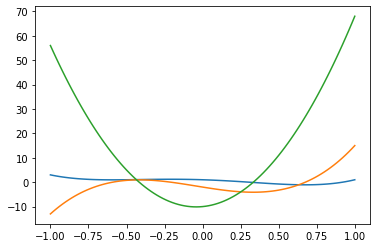

In [31]:
P = Polynomial([0, 0, 12, 10, 2])
Q, k, X = factor(P)
showFactors(Q, k, X)
P = Polynomial([1, -2, -5, 1, 6])
P.show()
P.plot(-1, 1)
P.diff().plot(-1, 1)
P.diff().diff().plot(-1, 1)
P = Polynomial([1, 2, 3])
print(P.coef, P.deg)
P.show()


In [67]:
Polynomial([1, 2, 3])== Polynomial([1, 2, 3])

True

In [68]:
Polynomial([1, 2, 3])!= Polynomial([1, 2, 3])

False

In [69]:
Polynomial([1, 2, 3])!= Polynomial([1, 2, 4])

True

In [141]:
P = Polynomial([1, 2, 1])
P.show()
Q = Polynomial([-3, 2, -1, 0, 0, 1])
Q.show()
(P + Q).show()
(P - Q).show()
(P * Q).show()
(P - Q).show()

(Q//P).show()
(Q%P).show()
(P//Q).show()
(P%Q).show()
(P//P).show()
(P%P).show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [131]:
P=Polynomial([1,1])
P.show()
(P**20).show()
P=Polynomial([1,1])
P.show()
(P**2).show()
(-P).show()
Q=Polynomial([2,1,3])
Q.show()
P+=Q
P.show()
P-=Q
P.show()
P*=Q
P.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [143]:
P = Polynomial([1, 2, 1])
P.show()
(P+5).show()
(P-5).show()
(P*5).show()
(P//5).show()
(P%5).show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [168]:
P = Polynomial([1, 2, 0,1])
P.show()
(P.integrate()).show()
P.diff().show()
P.diff(3).show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>